## version 2.0

# Class methods and Static methods
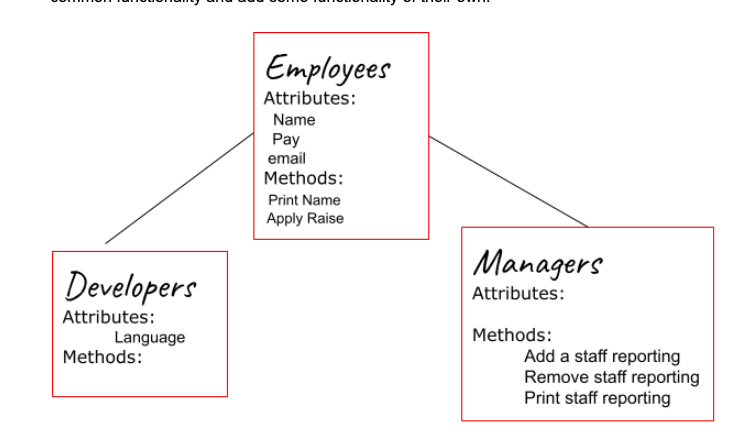

## Class methods 
These are methods(functions) that apply to the Class rather than the instance. To define a class method we use the decorator **@classmethod** and the first argument **cls**(by convention)

In [1]:
# Adding the raise method(2)
class Employee:
    num_of_emp = 0
    raise_amount = 1.04
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@acme.ie'
        self.pay = pay
        #Every time you create an instance increase the  no_of_emp by 1.
        Employee.num_of_emp += 1
    # fullname method   
    def fullname(self): # Definition of method. Self refers to the instance that calls the method
        return '{} {}'.format(self.first, self.last) # {} placeholders
    # Raise method
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)  #You can also use self.raise amount
        
    @classmethod
    def set_raise_amount(cls,amount):
        cls.raise_amount = amount

In [3]:
#Create the employees
emp_1 = Employee('Colm','Ward',40000)
emp_2 = Employee('Fidelma','Grady',60000)

In [4]:
# print the raise amounts
print(Employee.raise_amount)
print(emp_1.raise_amount)
print(emp_1.raise_amount)

1.04
1.04
1.04


In [5]:
# call the class method
Employee.set_raise_amount(1.05)

In [6]:
# print the raise amounts
print(Employee.raise_amount)
print(emp_1.raise_amount)
print(emp_1.raise_amount)

1.05
1.05
1.05


## Alternative Constructors
Using class methods as alternative constructors. Alternative Constructors are used to modify how the class behaves when creating an instance.
Let's start with a problem!

### The Problem
Let us say we are handed data looks that like this`:<br>
emp_str_1 = 'Fred-Flinstone-50000'<br>
emp_str_2 = 'Steve-Romley-20000'<br>
emp_str_3 = 'Mary-Creighton-9000'<br>
Our problem is that we do not know how to construct our instances with the data presented in this format. We could, of course fix the problem before we create the instances. So we could reformat the data before we create the instance. Remember that we could have thousands of records in this format. 

### Clean the data without using an Alternative Constructor

In [7]:
# Without an alternative constructor we would have to use an external function to parse the text
emp_str_1 = 'Fred-Flinstone-50000'
emp_str_2 = 'Steve-Romley-20000'
emp_str_3 = 'Mary-Creighton-9000'

first, last, pay = emp_str_1.split('-')

new_emp_1 = Employee(first, last, pay)

#new_emp_1 = Employee.from_string(emp_str_1)

print(new_emp_1.email)
print(new_emp_1.pay)


Fred.Flinstone@acme.ie
50000


### Build an  Alternative Constructor  inside your class

In [8]:
# Adding the Alternative Constructor
class Employee:
    num_of_emp = 0
    raise_amount = 1.04
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@acme.ie'
        self.pay = pay
        #Every time you create an instance increase the  no_of_emp by 1.
        Employee.num_of_emp += 1
    # fullname method   
    def fullname(self): # Definition of method. Self refers to the instance that calls the method
        return '{} {}'.format(self.first, self.last) # {} placeholders
    # Raise method
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)  #You can also use self.raise amount
        
    @classmethod
    def set_raise_amount(cls,amount):
        cls.raise_amount = amount
    
    # Add an Alternative Constructor to handle different type of input
    @classmethod
    def from_string(cls, emp_str):
        first, last, pay = emp_str.split('-')
        return cls(first, last, pay)

### Apply the Alternative Constructor

In [9]:

# No standard format
emp_str_1 = 'Fred-Flinstone-50000'
emp_str_2 = 'Steve-Romley-20000'
emp_str_3 = 'Mary-Creighton-9000'

# Standard formst- Create normal employees
emp_1 = Employee('Colm','Ward',40000)
emp_2 = Employee('Fidelma','Grady',60000)

# Create a special employee
emp_3 = Employee.from_string(emp_str_3)# call the from_string method

print(emp_3.email)
print(emp_3.pay)
print(emp_2.email)

Mary.Creighton@acme.ie
9000
Fidelma.Grady@acme.ie


## Static Method
Static methods do not refer to instance or classes. They are more like stand alone functions. For example, say we need a function that takes in a date and work out whether it's a weekday or not. This is related to the Employee class but it's not Associated with a **class** or **instance**. A **static method** distinguishes it self by not having an initial argument of self or CLS.

In [48]:
# Adding a Static Method
class Employee:
    num_of_emp = 0
    raise_amount = 1.04
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@acme.ie'
        self.pay = pay
        #Every time you create an instance increase the  no_of_emp by 1.
        Employee.num_of_emp += 1
    # fullname method   
    def fullname(self): # Definition of method. Self refers to the instance that calls the method
        return '{} {}'.format(self.first, self.last) # {} placeholders
    # Raise method
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)  #You can also use self.raise amount
        
    @classmethod
    def set_raise_amount(cls,amount):
        cls.raise_amount = amount
    
    # Add an Alternative Constructor to handle different type of input
    @classmethod
    def from_string(cls, emp_str):
        first, last, pay = emp_str.split('-')
        return cls(first, last, pay)
     
    # Add an Static method as a function
    @staticmethod
    def is_workday(day):
        if day.weekday() == 5 or day.weekday() == 6:
            return False
        return True

In [49]:
#Apply the Alternative Constructor
import datetime
my_date = datetime.date(2020,11,25)
print(Employee.is_workday(my_date))

True


## Class Inheritance
This is used to create classes that inherit the attributes and methods from another class. These are sometimes referred to as sub-classes. Sub-classes can create their own functionality without affecting the parent class.

### A Problem
We wish to create different types of employees: Managers and Developers.

In [50]:
# Create a new class called Developer add paranthis to specify what class you wish to inherite from
class Developer(Employee): #We are inheriting from the Employee class
    pass # Nothing different about this class same as the Employee class
    

In [51]:
emp_1 = Employee('Colm','Ward',40000)
emp_2 = Employee('Fidelma','Grady',60000)

In [52]:
print(emp_1.pay)

40000


In [53]:
#Use the Developer class to create employees
dev_1 = Developer('Martin','Hayes',40000)
dev_2 = Developer('Laurance','Mallow',89000)

In [54]:
print(emp_2.email)
print(emp_2.pay)

Fidelma.Grady@acme.ie
60000


In [55]:
# Print Developer
print(dev_1.email)
print(dev_1.pay)
print(dev_1.fullname())

Martin.Hayes@acme.ie
40000
Martin Hayes


## Method resolution order

**Method resolution order.** Is the order which the methods are employed. In the developer class, the first check was to the developer class and as it did not find an init method there it went to the Employee class, because the Developer class inherits from the Employee class.

In [56]:
print(help(Developer))

Help on class Developer in module __main__:

class Developer(Employee)
 |  Developer(first, last, pay)
 |  
 |  Method resolution order:
 |      Developer
 |      Employee
 |      builtins.object
 |  
 |  Methods inherited from Employee:
 |  
 |  __init__(self, first, last, pay)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  apply_raise(self)
 |      # Raise method
 |  
 |  fullname(self)
 |      # fullname method
 |  
 |  ----------------------------------------------------------------------
 |  Class methods inherited from Employee:
 |  
 |  from_string(emp_str) from builtins.type
 |      # Add an Alternative Constructor to handle different type of input
 |  
 |  set_raise_amount(amount) from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from Employee:
 |  
 |  is_workday(day)
 |      # Add an Static method as a function
 |  
 |  ----------------------------------------------

In [57]:
# Use the parent class apply_raise method.
print(dev_1.pay)
dev_1.apply_raise()
print(dev_1.pay)

40000
41600


In [58]:
# Give a different raise amount to Developers
class Developer(Employee):
    raise_amount = 1.10

In [59]:
dev_1 = Developer('Martin','Hayes',40000)

In [60]:
#  apply_raise method again
print(dev_1.pay)
dev_1.apply_raise()
print(dev_1.pay)

40000
44000


In [61]:
# Our employee raise amount stays the same.
print(emp_1.pay)
emp_1.apply_raise()
print(emp_1.pay)

40000
41600


 **Note:** So the point is that we can make changes to the sub classes without worrying about breaking anything in the parent class.

Sometimes you might wish to store different information for different employees. So for example when you create a developer you might like to store the programming language they specialise in.This is why you create a sub-class

In [66]:
# Add an init method to Developer
class Developer(Employee):
    raise_amount = 1.10
    # creating our own init method  
    def __init__(self, first, last, pay, prog_lang):
        super().__init__(first, last, pay) # initialise these parameters in the parent class
        self.prog_lang = prog_lang

In [67]:
print(help(Developer))

Help on class Developer in module __main__:

class Developer(Employee)
 |  Developer(first, last, pay, prog_lang)
 |  
 |  Method resolution order:
 |      Developer
 |      Employee
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, first, last, pay, prog_lang)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  raise_amount = 1.1
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Employee:
 |  
 |  apply_raise(self)
 |      # Raise method
 |  
 |  fullname(self)
 |      # fullname method
 |  
 |  ----------------------------------------------------------------------
 |  Class methods inherited from Employee:
 |  
 |  from_string(emp_str) from builtins.type
 |      # Add an Alternative Constructor to handle different type of input
 |  
 |  set_raise_amo

**Note:** There is another way of calling the parent init method using.
```python
Employee.__init__(self, first, last, pay)
```
instead of using the: 
```python
super().__init__(self, first, last, pay)
```
This version is used for multiple inheritance.

In [68]:
#Use the Developer class to create employees
dev_1 = Developer('Martin','Hayes',40000, 'python')
dev_2 = Developer('Laurance','Mallow',89000, 'PHP')

In [69]:
# Print Developer
print(dev_2.email)
print(dev_2.prog_lang)

Laurance.Mallow@acme.ie
PHP


## Another Subclass : Manager
We now want to expand our eco system to create a class  **Managers** and record the employees that work for them.    Our Manager class will be created with a number of employees that report to them. <ul> <li>We will pass in the employees that report to the manager in a List.</li><li> We will have to create an **init** method to cater for this.</li></ul>

In [70]:
''' Create a new class for managers. 
    With argument for employees that report to the manager 
    set initially to none (not an empty list).
'''

class Manager(Employee):
    raise_amount = 1.22
    # creating our own init method  
    def __init__(self, first, last, pay, employees= None): # No employees is the default
        super().__init__(first, last, pay) # super()-initialises these parameters in the parent class
        if employees is None:
            self.employees = []
        else:
            self.employees = employees
    
    # Add a method to add an employee to the manager        
    def add_emp(self, emp):
        if emp not in self.employees:
            self.employees.append(emp)
            
    # Add a method to remove an employee to the manager        
    def remove_emp(self, emp):
        if emp in self.employees:
            self.employees.remove(emp)
            
    # Add a method to print employeed reporting to a manager        
    def print_emps(self):
        for emp in self.employees:
            print('==>', emp.fullname())
    

In [71]:
# Create our company employess using the three classes
# Employees
emp_1 = Employee('Colm','Ward',40000)
emp_2 = Employee('Fidelma','Grady',60000)
# Developers
dev_1 = Developer('Martin','Hayes',40000, 'Python')
dev_2 = Developer('Laurance','Mallow',89000, 'Java')
# Managers with a list of the employees reporting to them
mgr_1 = Manager('Brian','McBryan',14000, [dev_1])
mgr_2 = Manager('Timothy','McTimmons',18000, [emp_1,emp_2])

In [72]:
# note we have inherated the methods from employees
print(mgr_1.fullname())

Brian McBryan


In [73]:
# Using the print_emps method within the Manager Class
mgr_1.print_emps()

==> Martin Hayes


In [74]:
mgr_2.print_emps()

==> Colm Ward
==> Fidelma Grady


In [75]:
# Use the add method to add a new developer
mgr_1.add_emp(dev_2)

In [76]:
mgr_1.print_emps()

==> Martin Hayes
==> Laurance Mallow


In [77]:
# Change dev_1 to report to mgr_2 first developer 
mgr_1.remove_emp(dev_1)
mgr_2.add_emp(dev_1)

In [78]:
#  
mgr_1.print_emps()

==> Laurance Mallow


In [79]:
#  
mgr_2.print_emps()

==> Colm Ward
==> Fidelma Grady
==> Martin Hayes


## Special(Magic Dundar) Methods 

In [80]:
# Look at an example
print (2+2)
print ('a'+'b')

4
ab


**Note** The add method behaves differently with different objects. How is this possible?

In [81]:
# Take the Employee example from before
class Employee:

   # Instance variables
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@acme.ie'
        self.pay = pay
    
    # fullname method 
    def fullname(self): # Definition of method. Self refers to the instance that calls the method
        return '{} {}'.format(self.first, self.last) # {} placeholders

In [82]:
#Create the employees
emp_1 = Employee('Colm','Ward',40000)
emp_2 = Employee('Fidelma','Grady',60000)

In [83]:
# Note: We cannot print out objects directly. This is important as you will often make this mistake.
print(emp_1)

We use special methods to overcome these problems. Special methods begin with a dunder __. <br>
```python 
__init__  
``` 
is an example of a special method.<br> The 
```python 
__init__
```
method is implicitly called when you create a class object. There are two other dunder methods we should almost always use: 
```python
__repr__

__str__

``` 
(Represent and String)

<hr>

```python

__repr__

``` 
is an unambigious representation of the object, and should be used for debugging or logging values. To be seen by other developers.
```python

__str__

``` 
Is meant to be used to display information to the end user. (print object)
<hr>

In [87]:
# Take the example from before
class Employee:

   # Instance variables
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@acme.ie'
        self.pay = pay
    
    # format it as if you were creating the object
    def __repr__(self):
        return "Employee({}, {}, {})".format(self.first,self.last,self.pay)
    
    # fullname method 
    def fullname(self): # Definition of method. Self refers to the instance that calls the method
        return '{} {}'.format(self.first, self.last) # {} placeholders

In [88]:
#Create the employees
emp_1 = Employee('Colm','Ward',40000)
emp_2 = Employee('Fidelma','Grady',60000)

In [86]:
print(emp_1)

Employee(Colm, Ward, 40000)


In [89]:
# Take the example from before
class Employee:

   # Instance variables
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.email = first + '.' + last + '@acme.ie'
        self.pay = pay
   
    # fullname method 
    def fullname(self): # Definition of method. Self refers to the instance that calls the method
        return '{} {}'.format(self.first, self.last) # {} placeholders
    
     # format it as if you were creating the object
    def __repr__(self):
        return "Employee({}, {}, {})".format(self.first,self.last,self.pay)
    
    def __str__(self):
        return '{} - {}'.format(self.fullname(), self.email)
    

In [90]:
#Create the employees
emp_1 = Employee('Colm','Ward',40000)
emp_2 = Employee('Fidelma','Grady',60000)

In [92]:
print(emp_1)

Colm Ward - Colm.Ward@acme.ie


In [93]:
print(str(emp_1))

Colm Ward - Colm.Ward@acme.ie


In [94]:
print(repr(emp_1))

Employee(Colm, Ward, 40000)


In [95]:
print(emp_1.fullname())

Colm Ward


## SAQ 1 
For the class Players create two subclasses Tennis Players and Swimmers. For Tennis Players you want to record if they play on hard court or grass. For the Swimmers you want to record there prefered stroke and their personal best times for their preferred stroke.

For each player sport can you create a method to count the number of players in each sport. 

In [62]:
class Players:
    total_players =0
    total_height =0
    avg_height =0
    def __init__(self, first,last, height ,dob, sport = "NA"):
        self.first = first
        self.last = last
        self.email = first +"."+ last + '@acme.ie'
        self.height = height
        self.dob  = dob
        self.sport = sport
        Players.total_players += 1
        Players.total_height = Players.total_height + self.height
    # fullname method 
    def fullname(self): # Definition of method. Self refers to the instance that calls the method
        return '{} {}'.format(self.first, self.last) # {} placeholders
     # fullname method   
    def calculateAge(self):
        days_in_year = 365.2425
        age = int(((datetime.date.today() - self.dob).days)/days_in_year)
        return age     
        

In [63]:
import datetime
dob1 = datetime.date(1978,11,4)
dob2 = datetime.date(1998,11,4)
ply_1 = Players('Tom','Creighton', 2, dob1, 'Rugby')
ply_2 = Players('Tony','Creighton', 2, dob2, 'Football')

Players.total_players

2

In [64]:
class TennisPlayers(Players):
    total_players = 0
    def __init__(self, first, last, height, dob, sport = 'Tennis', surface= 'Hardcourt'):
        super().__init__(first, last, height, dob, sport) # initialise these parameters in the parent class
        self.surface = surface
        TennisPlayers.total_players += 1

In [65]:
dob3 = datetime.date(2004,11,4)
ten_1  = TennisPlayers('Martina','Creighton', 2, dob3)
ten_2  = TennisPlayers('Martina','Boyle', 2, dob3)

In [66]:
print(ten_1.fullname())
print(ten_1.calculateAge())

Martina Creighton
16


In [67]:
print(Players.total_players)
print(TennisPlayers.total_players)

4
2


**Phew!** <div>
<img src="images/the_end.png" alt="The End" width="300" align="center"/></div>